In [247]:
import numpy as np
import requests
from typing import List, Dict, Any

from stock_indicators.indicators.common.quote import Quote
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from typing import List

In [248]:
class StockResponse:
    stock_data: List[Quote]

    def __init__(self, stock_data: List[Quote]):
        self.stock_data = stock_data

    @classmethod
    def from_json(cls, data: Dict[str, Any]) -> 'StockResponse':
        result = data["chart"]["result"][0]
        timestamps = result["timestamp"]
        indicators = result["indicators"]["quote"][0]

        stock_data: List[Quote] = []
        for i in range(len(timestamps)):
            date = datetime.fromtimestamp(timestamps[i])
            open_price = indicators["open"][i]
            high = indicators["high"][i]
            low = indicators["low"][i]
            close = indicators["close"][i]
            volume = indicators["volume"][i]

            # Skip if any value is None
            if 0 in (open_price, high, low, close, volume):
                continue

            stock_data.append(Quote(date, open_price, high, low, close, volume))

        return cls(stock_data=stock_data)

    def to_dataframe(self) -> pd.DataFrame:
        data = [[
            stock.date,
            stock.open,
            stock.high,
            stock.low,
            stock.close,
            stock.volume
        ] for stock in self.stock_data]
        return pd.DataFrame(data, columns=['date', 'open', 'high', 'low', 'close', 'volume'])

    def to_numpy(self) -> np.ndarray:
        data = [[
            stock.date,
            stock.open,
            stock.high,
            stock.low,
            stock.close,
            stock.volume
        ] for stock in self.stock_data]
        return np.array(data)

In [249]:
def compute_and_add_indicators(stock_data: List, df: pd.DataFrame) -> pd.DataFrame:
    """
    Compute technical indicators and add them to the DataFrame.

    Parameters:
    - stock_data (List): List of Quote objects containing stock data.
    - df (pd.DataFrame): DataFrame containing stock data.

    Returns:
    - pd.DataFrame: Updated DataFrame with technical indicators.
    """
    # Compute Technical Indicators
    sma = indicators.get_sma(stock_data, 14)
    rsi = indicators.get_rsi(stock_data, 14)
    macd = indicators.get_macd(stock_data)
    bollinger = indicators.get_bollinger_bands(stock_data, 20)
    atr = indicators.get_atr(stock_data, 14)
    wma = indicators.get_wma(stock_data, 14)
    tr = indicators.get_tr(stock_data)
    stoch_oscillator = indicators.get_stoch(stock_data)
    william = indicators.get_williams_r(stock_data)
    ema = indicators.get_ema(stock_data, 14)
    obv = indicators.get_obv(stock_data)
    ichimoku = indicators.get_ichimoku(stock_data)
    vwap = indicators.get_vwap(stock_data)
    smi = indicators.get_smi(stock_data)
    dema = indicators.get_dema(stock_data, 14)
    mfi = indicators.get_mfi(stock_data)
    cci = indicators.get_cci(stock_data)
    cmo = indicators.get_cmo(stock_data, 14)

    # Add indicators to the DataFrame
    for i in range(len(df)):
        df.loc[i, 'SMA'] = sma[i].sma
        df.loc[i, 'RSI'] = rsi[i].rsi
        df.loc[i, 'MACD'] = macd[i].macd
        df.loc[i, 'bollinger_upper'] = bollinger[i].upper_band
        df.loc[i, 'bollinger_lower'] = bollinger[i].lower_band
        df.loc[i, 'ATR'] = atr[i].atr
        df.loc[i, 'WMA'] = wma[i].wma
        df.loc[i, 'TR'] = tr[i].tr
        df.loc[i, '%K'] = stoch_oscillator[i].k
        df.loc[i, '%D'] = stoch_oscillator[i].d
        df.loc[i, '%R'] = william[i].williams_r
        df.loc[i, 'EMA'] = ema[i].ema
        df.loc[i, 'OBV'] = obv[i].obv
        df.loc[i, 'Ichimoku'] = ichimoku[i].kijun_sen
        df.loc[i, 'VWAP'] = vwap[i].vwap
        df.loc[i, 'SMI'] = smi[i].smi
        df.loc[i, 'DEMA'] = dema[i].dema
        df.loc[i, 'MFI'] = mfi[i].mfi
        df.loc[i, 'CCI'] = cci[i].cci
        df.loc[i, 'CMO'] = cmo[i].cmo

    # Handle missing values or NaNs
    df = df.dropna()

    # Convert columns to appropriate data types
    df = df.astype({
        'close': 'float64',
        'SMA': 'float64',
        'RSI': 'float64',
        'MACD': 'float64',
        'bollinger_upper': 'float64',
        'bollinger_lower': 'float64',
        'ATR': 'float64',
        'WMA': 'float64',
        'TR': 'float64',
        '%K': 'float64',
        '%D': 'float64',
        '%R': 'float64',
        'EMA': 'float64',
        'OBV': 'float64',
        'Ichimoku': 'float64',
        'VWAP': 'float64',
        'SMI': 'float64',
        'DEMA': 'float64',
        'MFI': 'float64',
        'CCI': 'float64',
        'CMO': 'float64'
    })

    # Verify data types (optional, can be disabled to save computation)
    # print(df.dtypes)

    return df

In [250]:
from pytz import timezone
from datetime import datetime

def convert_to_unix_timestamp(date_str: str) -> int:
    jakarta_tz = timezone("Asia/Jakarta")
    current_time = datetime.now(jakarta_tz)
    date_with_time = datetime.strptime(date_str, "%Y-%m-%d").replace(
        hour=current_time.hour,
        minute=current_time.minute,
        second=current_time.second,
        tzinfo=jakarta_tz
    )
    return int(date_with_time.timestamp())


In [251]:
# Define the from and to dates
from_date = "2010-01-01"  # Input format: YYYY-MM-DD
to_date = "2024-12-31"    # Input format: YYYY-MM-DD

# Convert the dates to Unix timestamps (seconds since epoch)
period1 = convert_to_unix_timestamp(from_date)
period2 = convert_to_unix_timestamp(to_date)

# Update the Yahoo Finance URL with dynamic dates
stock_url = f"https://query2.finance.yahoo.com/v8/finance/chart/BBCA.JK?period1={period1}&period2={period2}&interval=1d"
headers = {
    "Content-Type": "application/json",
    "User-Agent": "Chrome/58.0.3029.110"
}

r = requests.get(stock_url, headers=headers)
print(r.text)
r.json()

{"chart":{"result":[{"meta":{"currency":"IDR","symbol":"BBCA.JK","exchangeName":"JKT","fullExchangeName":"Jakarta","instrumentType":"EQUITY","firstTradeDate":1086660000,"regularMarketTime":1746782098,"hasPrePostMarketData":false,"gmtoffset":25200,"timezone":"WIB","exchangeTimezoneName":"Asia/Jakarta","regularMarketPrice":9000.0,"fiftyTwoWeekHigh":10950.0,"fiftyTwoWeekLow":7275.0,"regularMarketDayHigh":9050.0,"regularMarketDayLow":8975.0,"regularMarketVolume":47167500,"longName":"PT Bank Central Asia Tbk","shortName":"Bank Central Asia Tbk","chartPreviousClose":970.0,"priceHint":2,"currentTradingPeriod":{"pre":{"timezone":"WIB","start":1746756000,"end":1746756000,"gmtoffset":25200},"regular":{"timezone":"WIB","start":1746756000,"end":1746782100,"gmtoffset":25200},"post":{"timezone":"WIB","start":1746782100,"end":1746782100,"gmtoffset":25200}},"dataGranularity":"1d","range":"","validRanges":["1d","5d","1mo","3mo","6mo","1y","2y","5y","10y","ytd","max"]},"timestamp":[1262570400,1262656800

{'chart': {'result': [{'meta': {'currency': 'IDR',
     'symbol': 'BBCA.JK',
     'exchangeName': 'JKT',
     'fullExchangeName': 'Jakarta',
     'instrumentType': 'EQUITY',
     'firstTradeDate': 1086660000,
     'regularMarketTime': 1746782098,
     'hasPrePostMarketData': False,
     'gmtoffset': 25200,
     'timezone': 'WIB',
     'exchangeTimezoneName': 'Asia/Jakarta',
     'regularMarketPrice': 9000.0,
     'fiftyTwoWeekHigh': 10950.0,
     'fiftyTwoWeekLow': 7275.0,
     'regularMarketDayHigh': 9050.0,
     'regularMarketDayLow': 8975.0,
     'regularMarketVolume': 47167500,
     'longName': 'PT Bank Central Asia Tbk',
     'shortName': 'Bank Central Asia Tbk',
     'chartPreviousClose': 970.0,
     'priceHint': 2,
     'currentTradingPeriod': {'pre': {'timezone': 'WIB',
       'start': 1746756000,
       'end': 1746756000,
       'gmtoffset': 25200},
      'regular': {'timezone': 'WIB',
       'start': 1746756000,
       'end': 1746782100,
       'gmtoffset': 25200},
      'pos

# Checkpoint to restart from

In [252]:
json_data = r.json()
stock_response = StockResponse.from_json(json_data)
df   = stock_response.to_dataframe()
df

,date,open,high,low,close,volume
0,2010-01-04 09:00:00,1010.0,1010.0,965.0,1010.0,77812500
1,2010-01-05 09:00:00,1020.0,1020.0,990.0,1020.0,44442500
2,2010-01-06 09:00:00,990.0,1020.0,990.0,990.0,27782500
3,2010-01-07 09:00:00,995.0,995.0,965.0,995.0,38632500
4,2010-01-08 09:00:00,970.0,995.0,970.0,970.0,27427500
...,...,...,...,...,...,...
3619,2024-12-20 09:00:00,9650.0,9750.0,9625.0,9650.0,91576900
3620,2024-12-23 09:00:00,9700.0,9850.0,9700.0,9775.0,43292100
3621,2024-12-24 09:00:00,9850.0,9900.0,9750.0,9750.0,32415700
3622,2024-12-27 09:00:00,9800.0,9825.0,9725.0,9800.0,24016700


In [253]:
# init variable for dataset to be used
# remove all column except for date and move the close price to y
df = stock_response.to_dataframe()
df = df.drop(columns=['open', 'high', 'low', 'volume'])

# Add column for the next day close price
df['next_day_price_move'] = df['close'].shift(-1)

# Drop the last row as it will have NaN in 'next_day_price_move'
df = df.drop(df.index[-1])

# Create the label with 2 classes
df['next_day_price_move'] = np.where(df['close'] < df['next_day_price_move'], 1, 0)

# Ensure there are no invalid labels
assert df['next_day_price_move'].isin([0, 1]).all(), "Invalid label found"

df

,date,close,next_day_price_move
0,2010-01-04 09:00:00,1010.0,1
1,2010-01-05 09:00:00,1020.0,0
2,2010-01-06 09:00:00,990.0,1
3,2010-01-07 09:00:00,995.0,0
4,2010-01-08 09:00:00,970.0,1
...,...,...,...
3618,2024-12-19 09:00:00,9675.0,0
3619,2024-12-20 09:00:00,9650.0,1
3620,2024-12-23 09:00:00,9775.0,0
3621,2024-12-24 09:00:00,9750.0,1


# Define the Technical Indicators

In [254]:
from stock_indicators import indicators
stock_data = stock_response.stock_data # Holds the data in Quote object to be used for indicators
df = compute_and_add_indicators(stock_data, df)

print(df.dtypes)
df

date                   datetime64[ns]
close                         float64
next_day_price_move             int32
SMA                           float64
RSI                           float64
MACD                          float64
bollinger_upper               float64
bollinger_lower               float64
ATR                           float64
WMA                           float64
TR                            float64
%K                            float64
%D                            float64
%R                            float64
EMA                           float64
OBV                           float64
Ichimoku                      float64
VWAP                          float64
SMI                           float64
DEMA                          float64
MFI                           float64
CCI                           float64
CMO                           float64
dtype: object


,date,close,next_day_price_move,SMA,RSI,MACD,bollinger_upper,bollinger_lower,ATR,WMA,...,%R,EMA,OBV,Ichimoku,VWAP,SMI,DEMA,MFI,CCI,CMO
25,2010-02-08 09:00:00,905.0,1,959.642857,34.380342,-26.388796,1034.909935,910.090065,28.847318,949.285714,...,-85.185185,954.959065,-3.687725e+08,957.5,969.603984,-33.703340,932.940229,29.705645,-195.111111,-39.130435
26,2010-02-09 09:00:00,920.0,0,953.214286,38.516056,-26.915876,1027.530984,906.469016,28.929653,944.000000,...,-69.565217,950.297856,-2.815550e+08,957.5,965.723152,-35.487378,927.175151,32.328564,-150.845254,-39.130435
27,2010-02-10 09:00:00,910.0,1,948.571429,36.848686,-27.819817,1025.864028,899.135972,29.006106,938.238095,...,-78.260870,944.924809,-3.929075e+08,957.5,961.702346,-37.462674,920.228490,43.005164,-129.623639,-31.707317
28,2010-02-11 09:00:00,925.0,0,945.714286,40.976242,-27.014417,1023.302713,895.197287,28.362813,935.095238,...,-65.217391,942.268168,-3.499975e+08,957.5,960.456552,-37.562774,918.562269,49.004338,-105.717368,-19.047619
29,2010-02-12 09:00:00,925.0,0,943.214286,40.976242,-26.075549,1020.078077,891.921923,27.051183,932.333333,...,-65.217391,939.965745,-3.499975e+08,957.5,959.698039,-37.122096,917.425200,51.966102,-79.359931,-17.073171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3618,2024-12-19 09:00:00,9675.0,0,10092.857143,37.424092,-84.331735,10469.016682,9648.483318,210.981941,10046.666667,...,-85.714286,10028.208032,1.112335e+10,9987.5,4758.879156,-7.961127,9932.660208,44.421088,-192.664248,-15.294118
3619,2024-12-20 09:00:00,9650.0,1,10085.714286,36.879751,-106.950887,10487.633527,9609.866473,204.840374,9987.619048,...,-88.571429,9977.780294,1.103177e+10,9987.5,4760.505252,-14.491946,9851.268141,52.276306,-166.850220,-5.263158
3620,2024-12-23 09:00:00,9775.0,0,10055.357143,41.464286,-113.482120,10491.822112,9598.177888,204.494633,9946.190476,...,-74.285714,9950.742922,1.107506e+10,9987.5,4761.289233,-18.633865,9817.666666,48.336484,-115.452306,-26.984127
3621,2024-12-24 09:00:00,9750.0,1,10023.214286,40.825619,-119.300242,10484.042027,9563.457973,200.602159,9905.476190,...,-77.142857,9923.977199,1.104265e+10,9987.5,4761.879019,-22.130776,9785.447484,44.704262,-91.914475,-28.125000


# Feature Selection with Recursive Feature Elimination (RFE)

In [255]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Prepare features and target
X = df.loc[:, (df.columns != 'next_day_price_move') & (df.columns != 'date') & (df.columns != 'close')]
y = df['next_day_price_move']  # 0 = down, 1 = neutral, 2 = up

# Use a classifier suitable for multiclass
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Select top N features (e.g., 5)
selector = RFE(estimator=model, n_features_to_select=10)
selector = selector.fit(X, y)

# Get selected features
selected_features = X.columns[selector.support_]
# dummy selected_features if I want to try all the features
# selected_features = X.columns
# selected_features = ["MACD", "ATR", "RSI", "MFI", "DEMA"]
# selected_features = ["MACD", "ATR", "RSI", "MFI", "DEMA", "VWAP", "CCI"]
# selected_features = ["SMA", "RSI", "MACD",]
print("Selected features:", selected_features)

# Filter dataset with selected features
X = df[selected_features]


# Optianlly, using RFECV
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

model = RandomForestClassifier(n_estimators=100, random_state=42)
cv = StratifiedKFold(n_splits=5)

rfecv = RFECV(estimator=model, step=1, cv=cv, scoring='accuracy')
rfecv.fit(X, y)

selected_features = X.columns[rfecv.support_]
print("Optimal number of features:", rfecv.n_features_)
print("Selected features:", selected_features.tolist())

X = df[selected_features]

# save the selected feature
with open('keras_models-percobaan/selected_features.txt', 'w') as f:
    for feature in selected_features:
        f.write(f'{feature}\n')

Selected features: Index(['RSI', 'MACD', 'ATR', '%K', '%D', '%R', 'SMI', 'MFI', 'CCI', 'CMO'], dtype='object')
Optimal number of features: 10
Selected features: ['RSI', 'MACD', 'ATR', '%K', '%D', '%R', 'SMI', 'MFI', 'CCI', 'CMO']


# Visualize the selected features

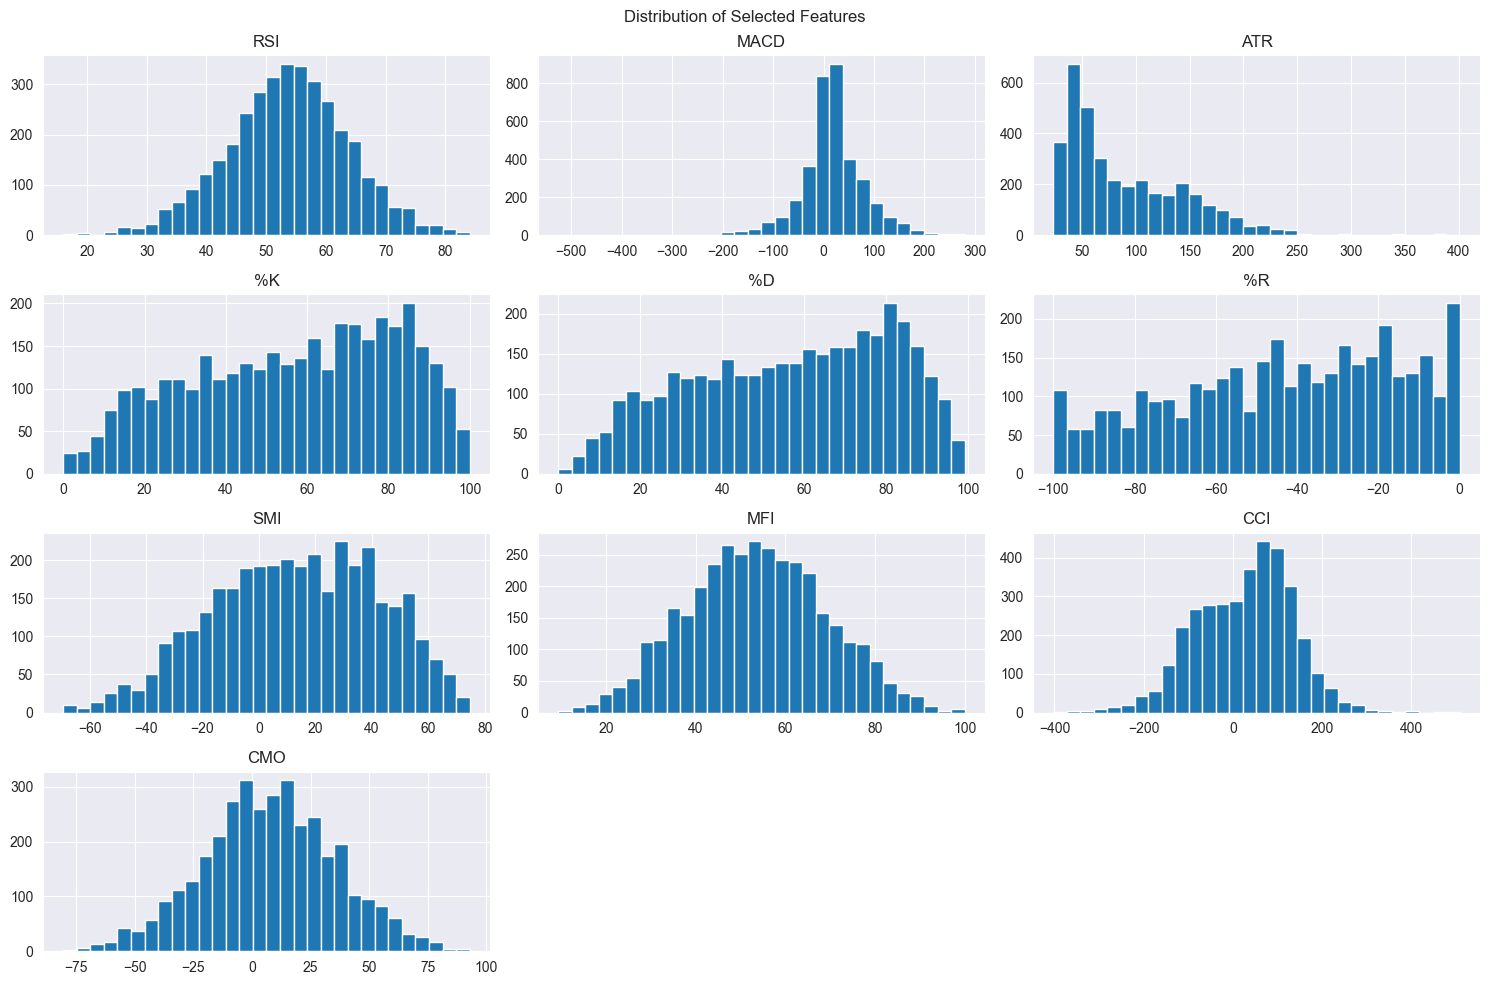

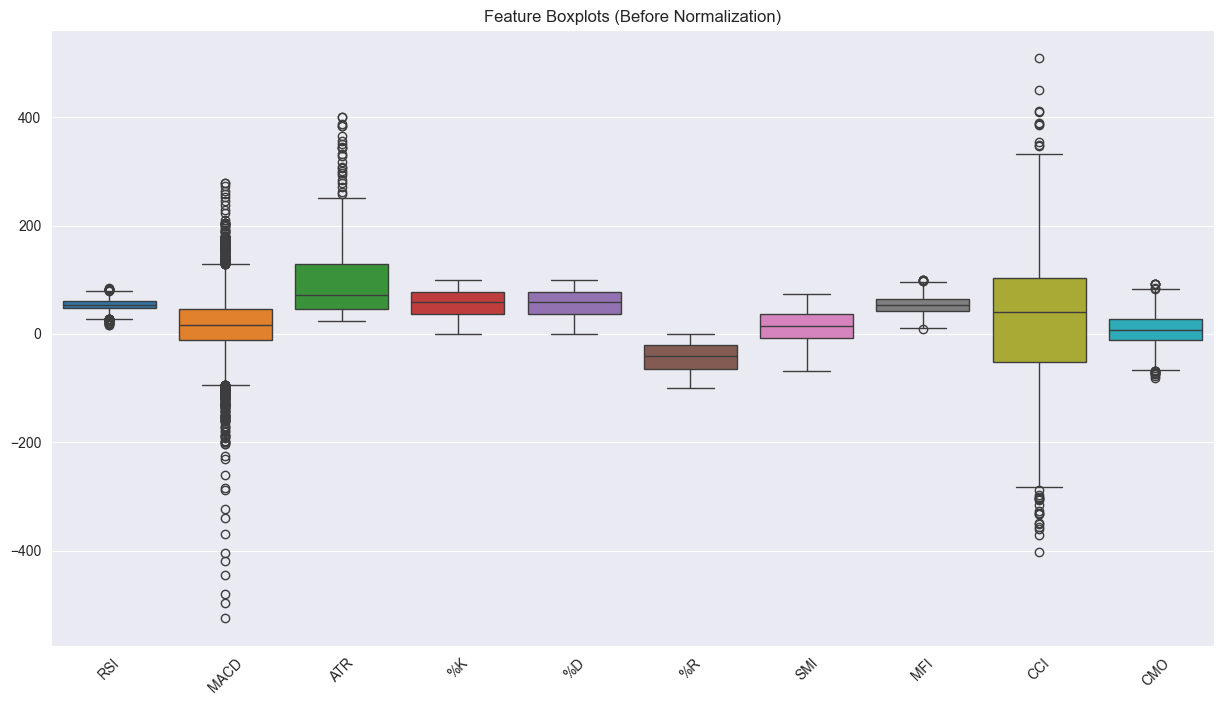

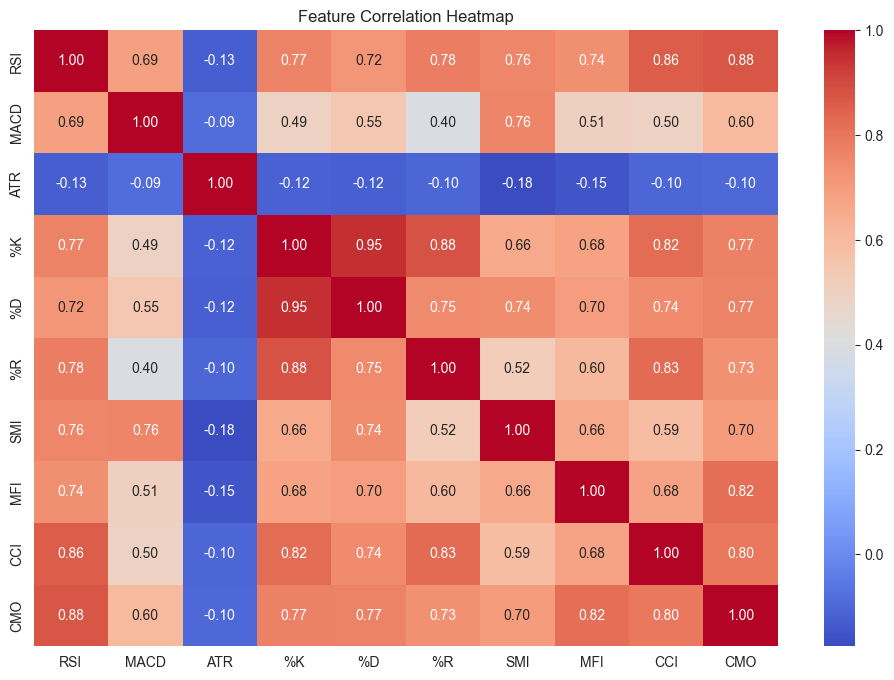

In [256]:
X.hist(figsize=(15, 10), bins=30)
plt.suptitle('Distribution of Selected Features')
plt.tight_layout()
plt.show()

# Boxplot for feature distributions before normalization
plt.figure(figsize=(15, 8))
sns.boxplot(data=X)
plt.title('Feature Boxplots (Before Normalization)')
plt.xticks(rotation=45)
plt.show()

# Compute the correlation matrix
correlation_matrix = X.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Heatmap')
plt.show()

# Prepare the Data for Training and Testing

In [257]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Exclude the 'date' and 'next_day_price_move' columns before normalization
df_features = df[selected_features]
df_normalized = pd.DataFrame(scaler.fit_transform(df_features), columns=df_features.columns)

# Add the 'date' column back to the normalized DataFrame
df_normalized.insert(0, 'date', df['date'].values)

# Move 'next_day_price_move' to the last column
df_normalized['next_day_price_move'] = df['next_day_price_move'].values


print(df_normalized.head())

                 date       RSI      MACD       ATR        %K        %D  \
0 2010-02-08 09:00:00 -1.894168 -0.679286 -1.115795 -1.973312 -2.024095   
1 2010-02-09 09:00:00 -1.487774 -0.687408 -1.114312 -1.648982 -1.951640   
2 2010-02-10 09:00:00 -1.651618 -0.701337 -1.112935 -1.361815 -1.725912   
3 2010-02-11 09:00:00 -1.246025 -0.688926 -1.124524 -1.098047 -1.422789   
4 2010-02-12 09:00:00 -1.246025 -0.674459 -1.148155 -1.040613 -1.212098   

         %R       SMI       MFI       CCI       CMO  next_day_price_move  
0 -1.496227 -1.605002 -1.539038 -2.035151 -1.643195                    1  
1 -0.938255 -1.666074 -1.369852 -1.628506 -1.643195                    0  
2 -1.248879 -1.733693 -0.681177 -1.433555 -1.382174                    1  
3 -0.782944 -1.737120 -0.294211 -1.213941 -0.937018                    0  
4 -0.782944 -1.722034 -0.103168 -0.971810 -0.867590                    0  


In [258]:
df_normalized.dtypes # just checking the dtypes

date                   datetime64[ns]
RSI                           float64
MACD                          float64
ATR                           float64
%K                            float64
%D                            float64
%R                            float64
SMI                           float64
MFI                           float64
CCI                           float64
CMO                           float64
next_day_price_move             int32
dtype: object

In [259]:
# from sklearn.model_selection import train_test_split
#
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

def create_sliding_window(data, window_size):
    """
    Create sliding window data for time series.

    Parameters:
    - data (np.ndarray): The input data as a NumPy array.
    - window_size (int): The size of the sliding window.

    Returns:
    - X (np.ndarray): The feature windows.
    - y (np.ndarray): The target values.
    """
    X, y = [], []
    for i in range(len(data) - window_size):
        # Extract a window of features
        X.append(data[i:i + window_size, :-1])  # All features except the target
        # Extract the target value corresponding to the end of the window
        y.append(data[i + window_size, -1])    # The target is the last column
    return np.array(X), np.array(y)

window_size = 5  # Define the size of the sliding window

# Convert the DataFrame to a NumPy array
data = df_normalized.drop(columns=['date']).values

# Create the sliding window data
X, y = create_sliding_window(data, window_size)

# Split the data into training and testing sets
# split_ratio = 0.9
# split_index = int(len(X) * split_ratio)
train_size = int(len(X) * 0.8)
val_size = int(len(X) * 0.1)

# X_train, X_test = X[:split_index], X[split_index:]
# y_train, y_test = y[:split_index], y[split_index:]
X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:train_size + val_size]
y_val = y[train_size:train_size + val_size]

X_test = X[train_size + val_size:]
y_test = y[train_size + val_size:]

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (2874, 5, 10), y_train shape: (2874,)
X_test shape: (360, 5, 10), y_test shape: (360,)


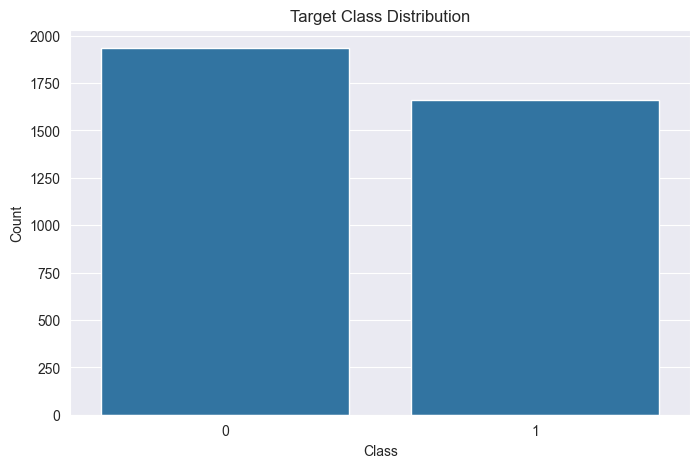

Class Distribution:
next_day_price_move
0    0.537799
1    0.462201
Name: proportion, dtype: float64


In [260]:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x=df_normalized['next_day_price_move'])
plt.title('Target Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# print the class distribution
class_distribution = df_normalized['next_day_price_move'].value_counts(normalize=True)
print("Class Distribution:")
print(class_distribution)

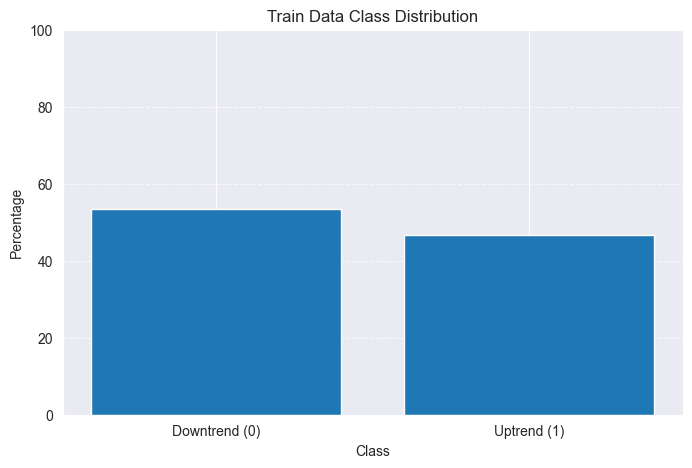

Train Data Class Distribution:
   Class  Count  Percentage
0    0.0   1536   53.444676
1    1.0   1338   46.555324


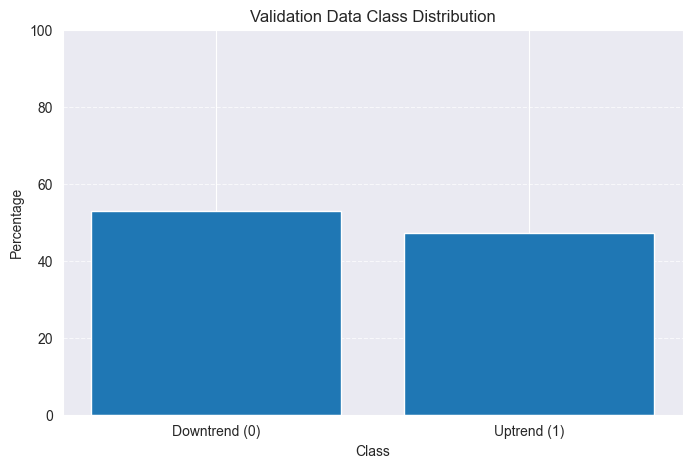

Validation Data Class Distribution:
   Class  Count  Percentage
0    0.0    190   52.924791
1    1.0    169   47.075209


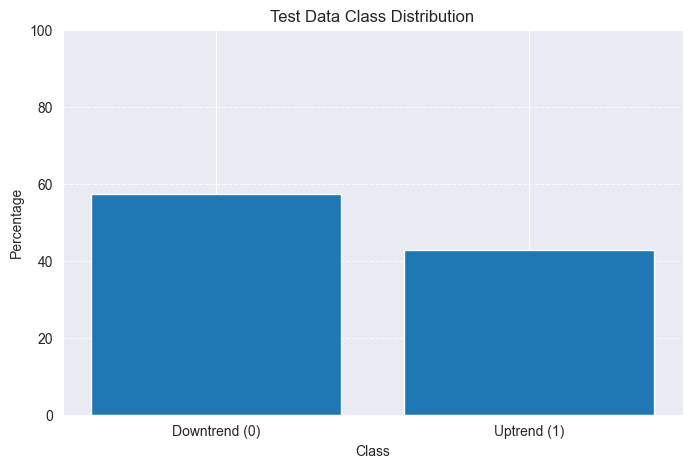

Test Data Class Distribution:
   Class  Count  Percentage
0    0.0    206   57.222222
1    1.0    154   42.777778


In [261]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Function to calculate and display class distribution
def plot_class_distribution(y_train, y_val, y_test):
    datasets = {'Train': y_train, 'Validation': y_val, 'Test': y_test}
    class_labels = ['Downtrend (0)', 'Uptrend (1)']

    for name, y in datasets.items():
        # Calculate class distribution
        unique, counts = np.unique(y, return_counts=True)
        distribution = pd.DataFrame({'Class': unique, 'Count': counts})
        distribution['Percentage'] = (distribution['Count'] / len(y)) * 100

        # Plot the distribution
        plt.figure(figsize=(8, 5))
        plt.bar(distribution['Class'], distribution['Percentage'], tick_label=class_labels)
        plt.title(f'{name} Data Class Distribution')
        plt.xlabel('Class')
        plt.ylabel('Percentage')
        plt.ylim(0, 100)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

        # Print the distribution
        print(f"{name} Data Class Distribution:")
        print(distribution)

# Call the function
plot_class_distribution(y_train, y_val, y_test)

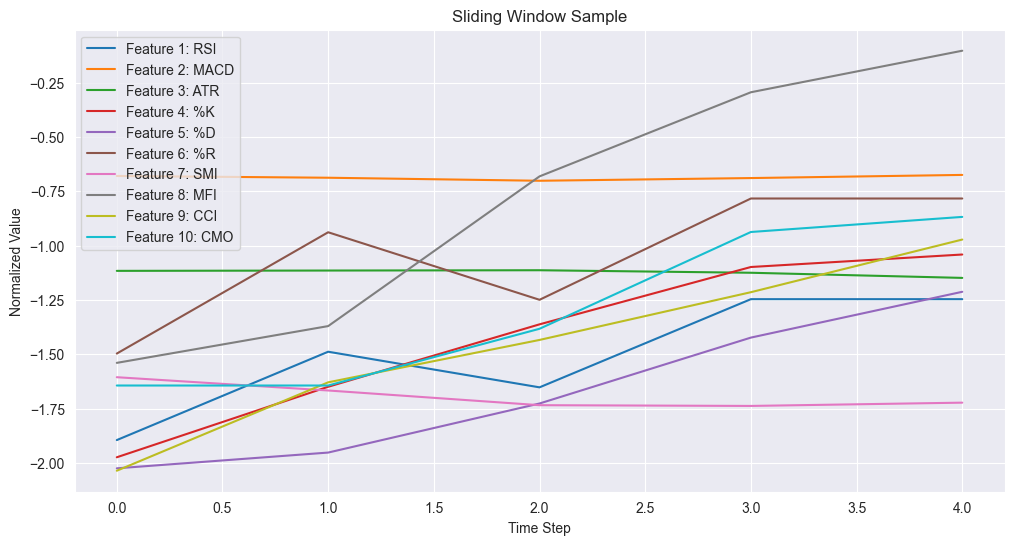

In [262]:
# Visualize a sample sliding window
sample_index = 0  # Change this to visualize different samples
sample_window = X_train[sample_index]

plt.figure(figsize=(12, 6))
for i in range(sample_window.shape[1]):
    plt.plot(sample_window[:, i], label=f'Feature {i+1}: {selected_features[i]}')
plt.title('Sliding Window Sample')
plt.xlabel('Time Step')
plt.ylabel('Normalized Value')
plt.legend()
plt.show()

# Visualize the selected features after normalization

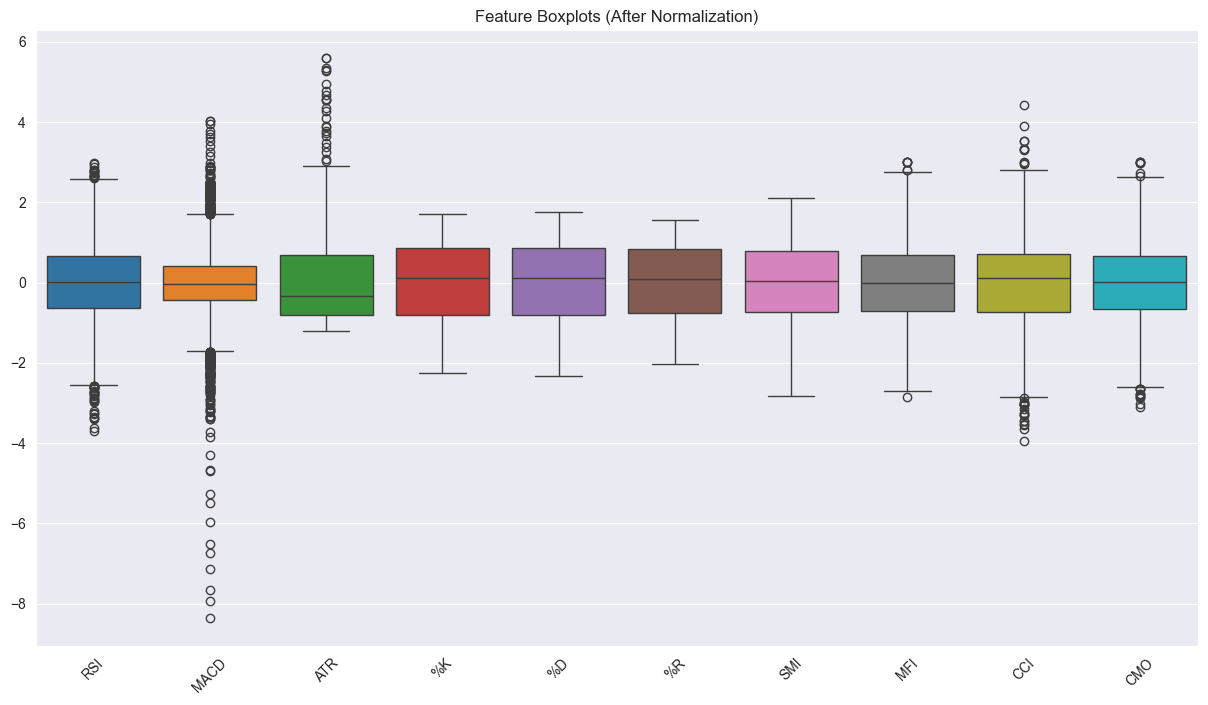

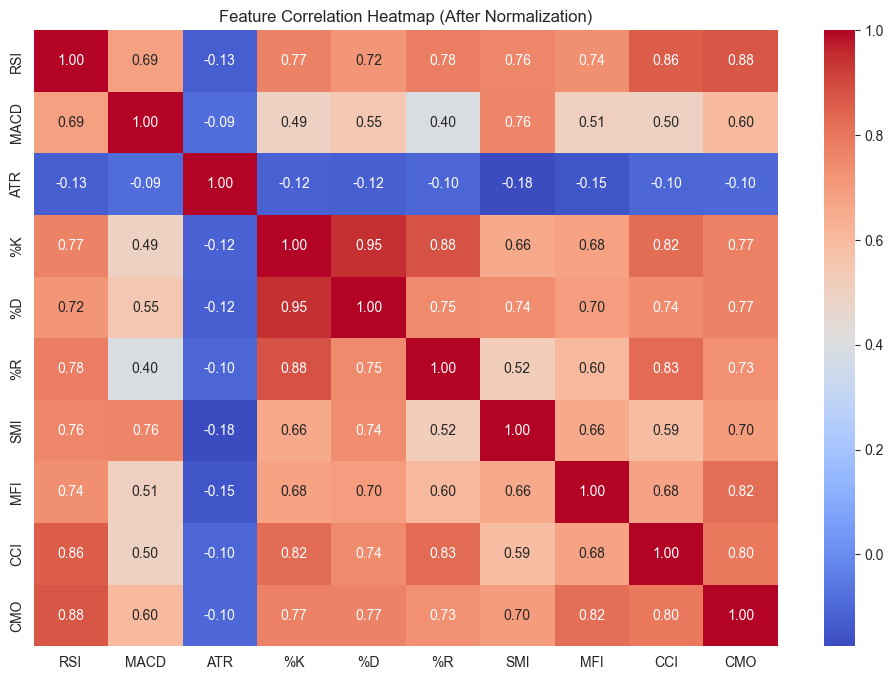

In [263]:
# Boxplot for feature distributions after normalization
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_normalized[selected_features])
plt.title('Feature Boxplots (After Normalization)')
plt.xticks(rotation=45)
plt.show()

# Correlation heatmap after normalization
plt.figure(figsize=(12, 8))
sns.heatmap(df_normalized[selected_features].corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Heatmap (After Normalization)')
plt.show()


# Train and Evaluate the Model with LSTM

In [264]:
from sklearn.metrics import f1_score
from tensorflow.keras.callbacks import Callback
import numpy as np
from tensorflow.keras import backend as K
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import f1_score

# Early stop
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Reduce learning rate
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    verbose=1,
    min_lr=1e-6
)

# Save best model
model_checkpoint = ModelCheckpoint(
    "best_model.keras",
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Add F1 Score callback
class F1Callback(Callback):
    def __init__(self, validation_data):
        super().__init__()
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs=None):
        val_pred = self.model.predict(self.validation_data[0])
        val_pred_labels = (val_pred > 0.5).astype(int)  # threshold for binary
        f1 = f1_score(self.validation_data[1], val_pred_labels)
        print(f" - val_f1_score: {f1:.4f}")
        logs['val_f1_score'] = f1


f1_callback = F1Callback(validation_data=(X_val, y_val))


def focal_loss(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
        cross_entropy = -y_true * K.log(y_pred) - (1 - y_true) * K.log(1 - y_pred)
        weight = alpha * y_true * K.pow(1 - y_pred, gamma) + (1 - alpha) * (1 - y_true) * K.pow(y_pred, gamma)
        return K.mean(weight * cross_entropy, axis=-1)
    return loss

In [283]:
import tensorflow as tf
from keras import Sequential
from keras.layers import LSTM, Dropout, Dense, Bidirectional, BatchNormalization
from keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight

# Define the LSTM model
model = Sequential()

# LSTM (first layer)
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(BatchNormalization())
# model.add(Dropout(0.3))

# Middle LSTM Layer
model.add(LSTM(64, return_sequences=False))
model.add(BatchNormalization())
# model.add(Dropout(0.3))

# Final LSTM Layer
# model.add(LSTM(32, return_sequences=False))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

# Dense layer
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))


# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.summary()
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: w for i, w in enumerate(class_weights)}
alpha = class_weights.tolist()
model.compile(optimizer=Adam(),
              loss=focal_loss(alpha=0.8),
              # loss='binary_crossentropy',
              metrics=["accuracy"])

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    # class_weight=class_weights_dict,
    callbacks=[model_checkpoint, f1_callback],
)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

preds = model.predict(X_test)
print("Predicted class counts:", np.bincount((preds > 0.5).astype(int).flatten()))

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_34 (LSTM)              (None, 5, 128)            71168     
                                                                 
 batch_normalization_51 (Bat  (None, 5, 128)           512       
 chNormalization)                                                
                                                                 
 lstm_35 (LSTM)              (None, 64)                49408     
                                                                 
 batch_normalization_52 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dense_51 (Dense)            (None, 64)                4160      
                                                                 
 batch_normalization_53 (Bat  (None, 64)             

# Evaluate the model

12/12 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

        Down       0.62      0.49      0.54       206
          Up       0.46      0.60      0.52       154

    accuracy                           0.53       360
   macro avg       0.54      0.54      0.53       360
weighted avg       0.55      0.53      0.53       360



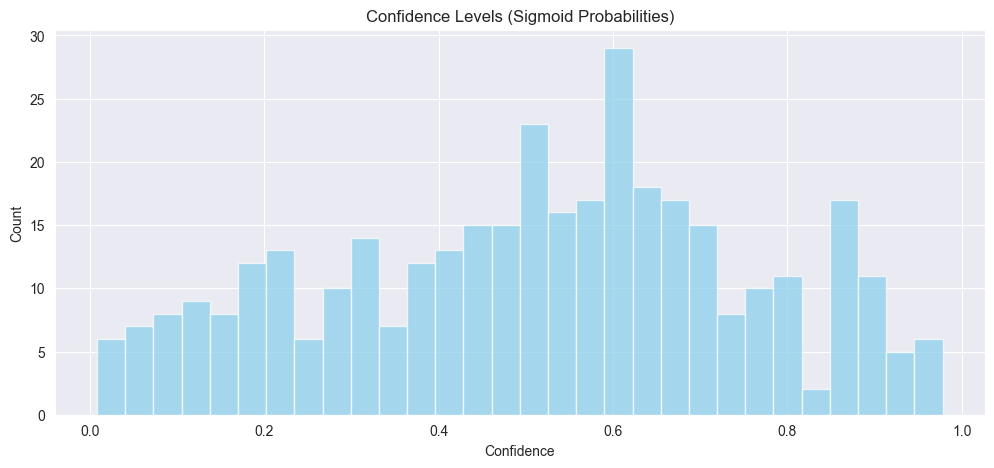

In [284]:
# Predict probabilities for the test set
pred_probs = model.predict(X_test)

# Convert probabilities to binary predictions using a threshold of 0.5
y_pred = (pred_probs > 0.5).astype(int).flatten()

# Compare predictions with actual values
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['Down', 'Up']))

# Visualize probability distributions
plt.figure(figsize=(12, 5))
plt.hist(pred_probs, bins=30, alpha=0.7, color='skyblue')
plt.title("Confidence Levels (Sigmoid Probabilities)")
plt.xlabel("Confidence")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# Plot learning curves

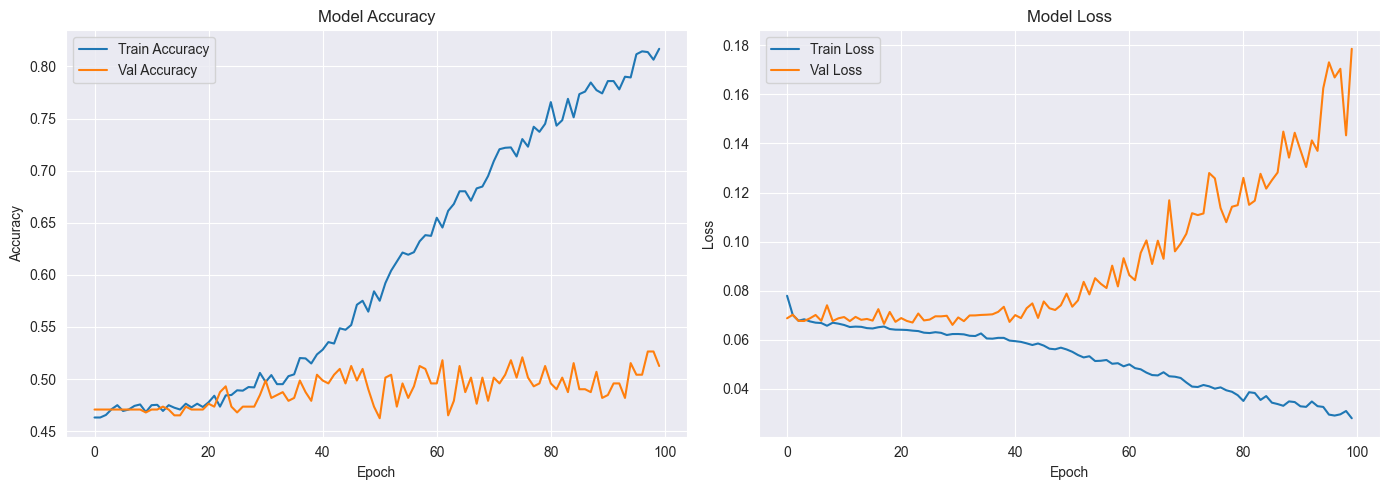

In [285]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy and loss
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

12/12 [==============================] - 0s 4ms/step


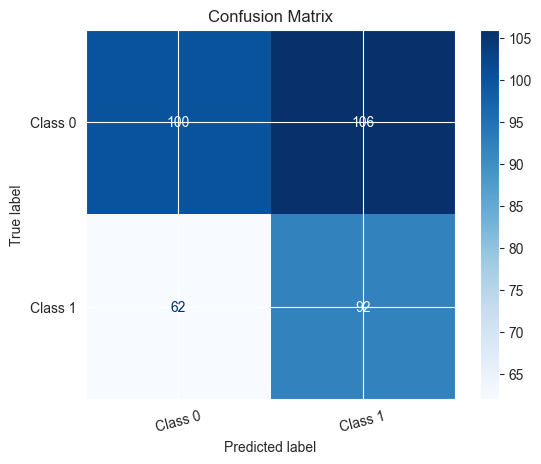

In [286]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test set
y_pred_probs = model.predict(X_test)
y_pred = (pred_probs > 0.5).astype(int).flatten()

# Determine unique classes in y_test
unique_labels = sorted(set(y_test))

# Dynamically set labels based on classification type
if len(unique_labels) == 2:  # Binary classification
    labels = ['Class 0', 'Class 1']
else:  # Multi-class classification
    labels = [f'Class {int(label)}' for label in unique_labels]

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.xticks(rotation=15)
plt.show()

# ANOTHER TESTING

In [287]:
# def create_sliding_window(data, window_size):
#     X, y = [], []
#     for i in range(len(data) - window_size):
#         X.append(data[i:i + window_size, :-1])  # Include all features except the target
#         y.append(data[i + window_size, -1])  # The target is the last column
#     return np.array(X), np.array(y)
#
# # Ensure normalized data is used
# data = df_normalized.drop(columns=['date']).values
#
# # Test different window sizes
# window_sizes = [5, 10, 20, 50]
# results = {}
#
# for window_size in window_sizes:
#     X, y = create_sliding_window(data, window_size)
#     split_index = int(len(X) * 0.8)
#     X_train, X_temp = X[:split_index], X[split_index:]
#     y_train, y_temp = y[:split_index], y[split_index:]
#
#     # Further split temp set into validation and test sets
#     val_split = int(len(X_temp) * 0.5)
#     X_val, X_test = X_temp[:val_split], X_temp[val_split:]
#     y_val, y_test = y_temp[:val_split], y_temp[val_split:]
#
#     # Train the model
#     model = Sequential()
#     model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.3))
#
#     # Middle LSTM Layer
#     model.add(LSTM(64, return_sequences=True))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.3))
#
#     # Final LSTM Layer
#     model.add(LSTM(32))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.2))
#
#     # Dense layer
#     model.add(Dense(32, activation='relu'))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.2))
#
#     # Output layer
#     model.add(Dense(3, activation='softmax'))
#     class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
#     alpha = class_weights.tolist()
#     # alpha = [0.4, 1.0, 0.4]
#     model.compile(optimizer=Adam(),
#                   loss=focal_loss_with_class_weights(gamma=2.0, alpha=alpha),
#                   # loss="sparse_categorical_crossentropy",
#                   metrics=["accuracy"])
#     history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, verbose=0, callbacks=[reduce_lr])
#
#     # Evaluate the model
#     loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
#     results[window_size] = accuracy
#
# # Print results
# print("Window Size vs Accuracy:", results)

In [288]:
# import tensorflow as tf
# print(tf.config.list_physical_devices('GPU'))

# Save model & testing

In [289]:
# model.save('keras_models-percobaan/stock_trend_predictor.keras')

In [290]:
# from keras.models import load_model
# model = load_model("keras_models_percobaan/stock_trend_predictor.keras", custom_objects={'loss': focal_loss_with_class_weights(gamma=2.0, alpha=alpha)})
#
# def predict_stock_trend(stock_code: str, date: str):
#     # Convert date
#     end_ts = convert_to_unix_timestamp(date)
#     start_ts = convert_to_unix_timestamp("2020-01-01")  # or go 100 days back
#
#     # Fetch data
#     stock_url = f"https://query2.finance.yahoo.com/v8/finance/chart/{stock_code}?period1={start_ts}&period2={end_ts}&interval=1d"
#     headers = {
#         "Content-Type": "application/json",
#         "User-Agent": "Mozilla/5.0"
#     }
#     r = requests.get(stock_url, headers=headers)
#     stock_data = StockResponse.from_json(r.json()).stock_data
#
#     # for testing only, print the last date that got from the api
#     print('Last date:')
#     print(stock_data[-1].date)
#
#     df = StockResponse(stock_data).to_dataframe()
#
#     # Compute indicators
#     df = compute_and_add_indicators(stock_data, df)
#
#     # Drop non-feature columns
#     feature_df = df.drop(columns=["date", "next_day_price_move"], errors="ignore")
#
#     # Only use feature that saved on "selected_features.txt"
#     selected_features = []
#     with open("keras_models/selected_features.txt", "r") as f:
#         for line in f:
#             selected_features.append(line.strip())
#     feature_df = feature_df[selected_features]
#
#     # Get last window (e.g., last 60 days)
#     window_size = X_train.shape[1]  # reuse your training window size
#     if len(feature_df) < window_size:
#         print("Not enough data to predict")
#         return
#
#     x_input = feature_df[-window_size:].values
#     x_input = x_input.reshape((1, x_input.shape[0], x_input.shape[1]))
#
#     # Ensure x_input does not contain decimal.Decimal objects by converting them to float
#     if isinstance(x_input, np.ndarray):
#         x_input = x_input.astype(float)  # Convert the entire NumPy array to float
#     else:
#         # For iterables other than NumPy arrays
#         x_input = np.array([float(value) for value in x_input])
#
#
#     # Load model
#     # model = load_model("stock_trend_predictor.h5", custom_objects={'focal_loss': focal_loss})
#
#     # Predict
#     pred = model.predict(x_input)
#     predicted_class = np.argmax(pred)
#
#     label_map = {0: "Downtrend", 1: "neutral", 2: "Uptrend"}
#     print(f"Prediction for {stock_code} on {date}: {label_map[predicted_class]}")
#     return predicted_class

In [291]:
# from datetime import datetime, timedelta
# import numpy as np
# import pandas as pd
# import requests
# import random
#
# # === MAIN LOOP ===
# total_tests = 50  # Change this to 50 if you want
# correct = 0
#
# for i in range(total_tests):
#     stock_code = random.choice(["BMRI.JK", "BBNI.JK", "PANI.JK", "ANTM.JK"])
#     today = datetime.now()
#     end_date = today - timedelta(days=2)
#     start_date = end_date - timedelta(days=1000)
#
#     url = f"https://query2.finance.yahoo.com/v8/finance/chart/{stock_code}?" \
#           f"period1={int(start_date.timestamp())}&period2={int(end_date.timestamp())}&interval=1d"
#     headers = {
#         "Content-Type": "application/json",
#         "User-Agent": "Mozilla/5.0"
#     }
#
#     r = requests.get(url, headers=headers)
#     stock_data = StockResponse.from_json(r.json())
#     df = stock_data.to_dataframe().dropna().reset_index(drop=True)
#
#     if len(df) < 62:
#         continue  # Not enough data to predict
#
#     random_index = random.randint(60, len(df) - 2)
#     last_date = df.loc[random_index - 1, "date"]
#     actual_date = df.loc[random_index, "date"]
#     close_last_date = df.loc[random_index - 1, "close"]
#     close_actual = df.loc[random_index, "close"]
#     price_change = close_actual - close_last_date
#
#     if price_change > 0.5:
#         actual_class = 2  # Uptrend
#     elif price_change < -0.5:
#         actual_class = 0  # Downtrend
#     else:
#         actual_class = 1  # neutral
#
#     # Predict using your model
#     predicted_class = predict_stock_trend(stock_code, actual_date.strftime("%Y-%m-%d"))
#
#     label_map = {0: "Downtrend", 1: "neutral", 2: "Uptrend"}
#     print(f"Test #{i+1}")
#     print(f"Stock Code       : {stock_code}")
#     print(f"Last Known Date  : {last_date.strftime('%Y-%m-%d')}")
#     print(f"Prediction Date  : {actual_date.strftime('%Y-%m-%d')}")
#     print(f"Close Last Date  : {close_last_date:.2f}")
#     print(f"Close Actual     : {close_actual:.2f}")
#     print(f"Actual Movement  : {label_map[actual_class]}")
#     print(f"Predicted        : {label_map[predicted_class]}")
#     print(f"{'✅ Correct' if predicted_class == actual_class else '❌ Incorrect'}")
#     print("-" * 50)
#
#     if predicted_class == actual_class:
#         correct += 1
#
# print(f"\n✅ Prediction Accuracy over {total_tests} tests: {correct / total_tests:.2%}")
